In [ ]:
import numpy as np
import pandas as pd # Для работы с данными
import scipy.stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов 

<p style="align: center;"><img align=center src="https://netology.ru/backend/tilda/images/tild3439-3364-4535-b334-656263633534__main.svg"  width=900></p>
<h3 style="text-align: center;"><b>Классификация. Логистическая регрессия и SVM</b></h3>

<p style="align: center;"><img align=center src="https://sun9-3.userapi.com/impg/rMxsV1l3x_NgXZnO2BR_Z_vQ5CMfAysGMkpVrg/5vII3kSwywk.jpg?size=1233x403&quality=96&proxy=1&sign=607ece16ae211ad91d8c9a1ba285c822&type=album"  width=900></p>
<div class="alert alert-info">
    <h2>Некоторые важные определения</h2>
<ul>
 <li><b>Классификация</b> - задача о разделении классов, по заданному набору признаков.</li>
    <li><b>Логистическая регрессия</b>  - это статистическая модель, используемая для прогнозирования вероятности возникновения некоторого события путём его сравнения с логистической кривой.</li>
    <li><b>Метод опорных векторов (англ. SVM)</b>  - поиск тем или иным способом разделяющей гиперплоскости между классами.</li>
    <li><b>Сигмоида (логистическая функция)</b>  - гладкая монотонная возрастающая нелинейная функция, которая часто применяется для «сглаживания» значений некоторой величины.</li>
</ul>
</div>


<h1><u>План урока</u></h1>

<p><font size="3" face="Arial">
<ul type="square"><a href="#1"></a>
    <li><a href="#1">Логистическая регрессия</a></li>
        <ul>
            <li><a href="#2">Теория. Масимизация правдоподобия</a></li>
            <li><a href="#3">Практика. Регрессия "из коробки"</a></li>    
    </ul>
    
    
    
   

<li><a href="#4">Метод опорных векторов. SVM.</a></li>
<ul><li><a href="#5">Теория. Проблема линейной неразделимости. Ядра</a></li>
            <li><a href="#6">Практика. Задача разделения ирисов Фишера</a></li>    
    </ul>


</ul></font></p>

<h2>Логистическая регрессия</h2>

<p id="1">Рассмотрим задачу логистической регрессии. В данной задаче ключевую роль играет функция <i><b>сигмоида</b></i> (логистическая функция), которая используется для прогнозирования вероятности возникновения некоторого события по значениям множества признаков:<
    /p>   $$\sigma (z) = \frac{1}{1+e^{-z}}\text{  ,  } z \in (-\infty, +\infty) \text{  ,  } \sigma(z) \in (-1, 1)$$
<p style="align: center;"><img align=center src="https://upload.wikimedia.org/wikipedia/commons/a/ac/Logistic-curve.png"  width=400></p>

Как и в задаче линейной регрессии задаем аргумент
$z=\theta^{T}x = \theta_{0} + \theta_{1}x_{1} + ... + \theta_{n}x_n$, где $\theta_{i}$ - параметры модели (веса), а $x_i$ - известные нам признаки.
<p id="2"><h3>Теория. Масимизация правдоподобия</h3>
Чтобы модель могла обучаться, ей необходимо получать "штраф" за то, что она ошибается. Подбираем такой параметр $\theta$, чтобы наша функция правдоподобия $L(\theta)$ была максимальной:
$$\hat{\theta} = argmax_{\theta}L(\theta) = argmax_{\theta} \prod\limits^{m}_{i=1}P(y=y_{i} | x = x_i)$$
</p>
После логарифмирования получаем: 
$$lnL(\theta)=\sum\limits_{i=1}^mlogP(y=y_i | x=x_i) = \sum\limits_{i=1}^m y_i lnf(\theta^Tx_i) + (1-y_i)ln(1-f(\theta^Tx_i))$$
где $y_i$ - индикаторная переменная. Если предсказание верно - $y_i = 1$, то в сумме остается только первый член, а если нет, то второй.

### Практика. Регрессия "из коробки"
<p id="3">Решаем задачу о предсказании пола спортсмена.</p>

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/athletes.csv') # датасет - https://www.kaggle.com/rio2016/olympic-games
data.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


In [ ]:
data.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


<p>Сделаем предобработку данных нашего датасета. Найдем и удалим пустые строчки нашего датасета</p>

In [ ]:
data[ pd.isnull(data['height'])].head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
12,258556239,Abbas Qali,IOA,male,10/11/92,NaN,NaN,aquatics,0,0,0
47,469953606,Abdoullah Bamoussa,ITA,male,6/8/86,NaN,NaN,athletics,0,0,0
50,325809293,Abdul Omar,GHA,male,10/3/93,NaN,NaN,boxing,0,0,0
52,262868423,Abdulaziz Alshatti,IOA,male,10/30/90,NaN,NaN,fencing,0,0,0
56,897549624,Abdullah Hel Baki,BAN,male,8/1/89,NaN,NaN,shooting,0,0,0


In [ ]:
data['height'].unique() 

array([1.72, 1.68, 1.98, 1.83, 1.81, 1.8 , 2.05, 1.93, 1.65, 1.7 , 1.75,
        nan, 1.61, 1.78, 1.76, 2.1 , 1.73, 1.85, 1.77, 1.9 , 1.86, 1.74,
       1.6 , 2.07, 1.88, 1.66, 1.62, 1.87, 2.03, 1.69, 1.82, 1.89, 1.94,
       1.95, 1.71, 1.84, 1.91, 1.67, 2.02, 1.58, 1.63, 1.79, 1.97, 1.56,
       1.55, 1.57, 1.46, 1.92, 1.64, 1.53, 1.99, 1.96, 2.  , 2.04, 1.47,
       1.52, 2.01, 1.51, 1.59, 2.08, 1.37, 1.5 , 1.45, 2.06, 1.54, 2.11,
       1.43, 1.49, 1.33, 1.48, 1.44, 2.13, 2.09, 2.21, 2.18, 1.21, 1.38,
       1.34, 2.15, 2.17, 1.42, 1.4 , 2.14])

In [ ]:
# обнуляем ячейки с отсутствием данных
data = data[pd.isnull(data['height']) == 0 ]
data = data[pd.isnull(data['weight']) == 0 ]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10858 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10858 non-null  int64  
 1   name         10858 non-null  object 
 2   nationality  10858 non-null  object 
 3   sex          10858 non-null  object 
 4   dob          10858 non-null  object 
 5   height       10858 non-null  float64
 6   weight       10858 non-null  float64
 7   sport        10858 non-null  object 
 8   gold         10858 non-null  int64  
 9   silver       10858 non-null  int64  
 10  bronze       10858 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 1017.9+ KB


<div class="alert alert-info"><p> Далее используем популярную библиотеку <b>scikit-learn</b> для классического машинного обучения. Для дополнительного изучения всю документацию можете найти на <a href="https://scikit-learn.org/stable/">сайте</a>. Она умеет довольно неплохо решать множество задач машинного обучения, но чаще всего испольузется для обучения, а не для конкретных задач.</p></div>

In [ ]:
from sklearn.linear_model import LogisticRegression

<p style="align: center;">Шаг 1. Предобработка данных. Для работы с переменными в рамках задачи <b><i>Логистической регрессии</i></b> нужно преобразовать категориальные переменные в числа. Например, вот так (см. рис), просто поставить в соответствие названию машин - уникальные числа.<img align=center src="https://miro.medium.com/max/875/1*K5JbqxIwwPmtiSNQhjLPRg.png"  width=800></p>

In [ ]:
# попробуем выбрать какие-нибудь признаки, для начала
selectedColumns = data [['height', 'sport','sex']]

# столбец sport - категориальная переменная (не путать с континуальными)
# переведем ее в значения 0 и 1, добавив столбцы с соответствующими названиями
X = pd.get_dummies (selectedColumns, columns = ['sport'])

# столбец sex является целевой переменной, удаляем его из Х

del X['sex']

print('Пометили вид спорта спортсмена единичкой.')
X.head()

Пометили вид спорта спортсмена единичкой.


,height,sport_aquatics,sport_archery,sport_athletics,sport_badminton,sport_basketball,sport_canoe,sport_cycling,sport_equestrian,sport_fencing,sport_football,sport_golf,sport_gymnastics,sport_handball,sport_hockey,sport_judo,sport_modern pentathlon,sport_rowing,sport_rugby sevens,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling
0,1.72,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.68,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.98,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.83,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1.81,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<p>LabelEncoder ставит в соответствие значению пола (женщина, мужчина) 0 и 1 </p>

In [ ]:
# целевая переменная (столбец sex) снова является категориальной 
# переведем значения столбца в числа, оставив один столбец

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
le.fit( data['sex'])

LabelEncoder()

In [ ]:
le.classes_

array(['female', 'male'], dtype=object)

In [ ]:
le.transform( ['male', 'female', 'male']) # пример расшифровки

array([1, 0, 1])

In [ ]:
le.inverse_transform([1, 0, 1])

array(['male', 'female', 'male'], dtype=object)

In [ ]:
# записываем в таргетную переменную y преобразованный столбец sex

y = pd.Series (data = le.transform(data['sex']))
y.head()

0    1
1    0
2    1
3    1
4    1
dtype: int64

In [ ]:
from sklearn.pipeline import make_pipeline # используем пайплайны для удобства
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

In [ ]:
model = LogisticRegression() # берем в качестве модели логистическую регресиию из scikit-learn

**<p>**Шаг 2 Текст, выделенный полужирным шрифтом. Обучение. Поделим данные на обучающую выборку и тестовую. Указываем в test_size долю датасета, которая пойдет на тестовую выбору</p**>**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# обучаем на части датасета (train)

model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [ ]:
predictions[:5] # посмотрим как выглядят наши предсказания

array([1, 1, 0, 1, 1])

In [ ]:
model.predict(X_test) # получаем массив

array([1, 1, 0, ..., 0, 0, 0])

In [ ]:
model.predict_proba(X_test)

array([[0.38105108, 0.61894892],
       [0.12674716, 0.87325284],
       [0.7348151 , 0.2651849 ],
       ...,
       [0.55096005, 0.44903995],
       [0.67211831, 0.32788169],
       [0.99087173, 0.00912827]])

<p>Получаем наш скор (точность предсказания) на обучающей и тестовой выборках.</p>

In [ ]:
model.score(X_train, y_train) 

0.7988157894736843

In [ ]:
model.score(X_test,y_test)

0.7955801104972375

<p>Итак, на данном этапе мы..</p>
<ul><li>познакомились с понятием логистической регерссии</li>
    <li>научились делать предобработку данных датасета</li>
    <li>посмотрели на практике регрессию "из коробки"</li>
</ul>

<h1>Метод опорных векторов. SVM.</h1>
<p id="4">Алгоритм заключается в переводе исходных векторов в пространство более высокой размерности и поиск разделяющей гиперплоскости с максимальным зазором в этом пространстве. Задача - разделить на классы. </p>
<img align=center src="https://wiki.loginom.ru/images/support-vector-machines.svg"  width=600></p>

$$r = y\frac{w^Tx +b}{||w||}$$
Здесь $w$ - это веса, $x$ - признаки.
Данная задача аналитически решается методом множителей Лагранжа. 
$$L(w,b;\lambda) = \frac{1}{2}||w||^2 - \sum\limits^{n}_{i=1}\lambda_i(c_i((w \cdot x_i) - b)-1) \rightarrow min_{w,b}max_{\lambda}$$
 где $\lambda_i \geq 0, 1 \leq i \leq n$

<div class="alert alert-info"><h3>Теория. Проблема линейной неразделимости.</h3><p id="5">Возникает проблема линейной неразделимости данных (когда у данных есть выбросы, шум). Если данные линейно неразделимы, то нужно перейти в признаковое пространство большей размерности, где классы уже могут быть разделены линейно.</p>
Записываем скалярное произведение в другом пространстве. </div>Ядра могут быть любые. Примеры: 
<ul>
    <li>Полиномиальное ядро $k(x,x') = (x \cdot x')^d$</li>
    <li>Полиномиальное ядро со смещением $k(x,x') = (x \cdot x' + 1)^d$</li>
     <li>Радиальная базисная функция $k(x,x') = exp (-\gamma ||x-x'||^2)$, для $\gamma > 0$</li> 
    <li>Радиальная функция Гаусса $k(x,x') = exp \left(-\frac{||x-x'||^2}{2\sigma^2}\right)$</li>
 </ul>
 <img align=center src="https://sun9-17.userapi.com/impg/WED5z6Jq6sM_D2kQduehRYIsoxaK5L3EZIwQvw/QxBRixWCKlA.jpg?size=1234x527&quality=96&proxy=1&sign=94a6398d0d6250781768375641f441f5&type=album"  width=600></p>
 $\text{ }$

In [ ]:
from sklearn.svm import SVC
# используем пайплайны
clf = make_pipeline(StandardScaler(), SVC(gamma='auto')) 
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

<p>Снова получаем наш скор, для обучающей и тестовой выборок.</p>

In [ ]:
clf.score(X_train, y_train) 

0.7992105263157895

In [ ]:
clf.score(X_test, y_test)

0.7965009208103131

<p>Без StandardScaler получаем более худший результат:</p>

In [ ]:
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
svc.score(X_train, y_train)

0.7976315789473685

In [ ]:
svc.score(X_test, y_test)

0.7952731737262124

### Практика. Задача разделения ирисов Фишера
<p>Рассмотрим последний пример классификации на сегодня. Множественная классификация ирисов Фишера - 3 класса.</p>
<img align=center id="6" src="https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png"  width=800></p>

In [ ]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [ ]:
iris = datasets.load_iris()
type(iris)

sklearn.utils.Bunch

In [ ]:
iris.target_names # значения таргетных перменных

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
iris.feature_names # 4 параметра | sepal - чашелистик, petal - лепесток

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
X = iris.data[:,:2] # забираем данные из датасета
Y = iris.target

In [ ]:
model = LogisticRegression() 
model2 = SVC()
model.fit(X,Y)
model2.fit(X,Y)

SVC()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

<p>Вот так разделяет регрессия:</p>

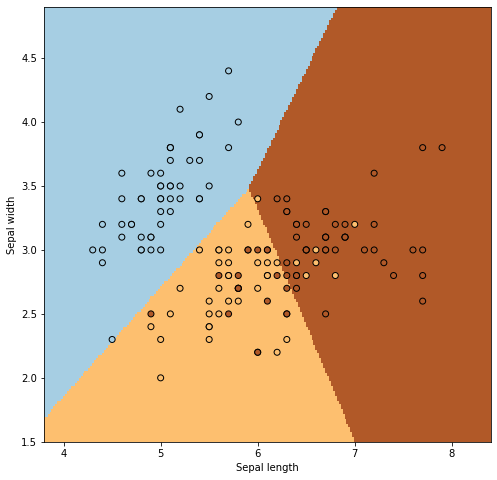

In [ ]:
x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5

h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(),yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8,8))
plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired)

plt.scatter(X[:,0], X[:,1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks()
plt.show()


<p>Теперь SVM</p>

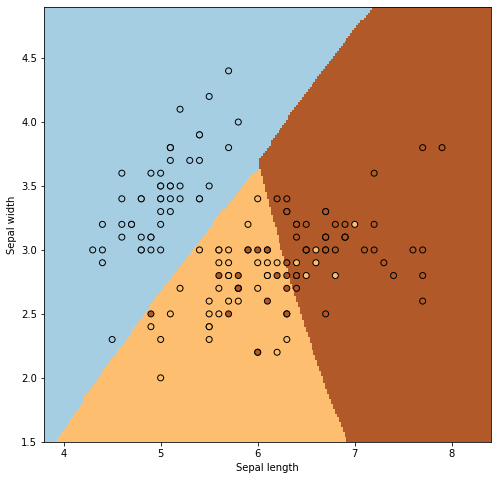

In [ ]:
Z = model2.predict(np.c_[xx.ravel(),yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8,8))
plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired)

plt.scatter(X[:,0], X[:,1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks()
plt.show()


<p>Если хотим нелинейное разделение, то нужно подбирать ядро. Например:</p>

In [ ]:
model2 = SVC(kernel = 'poly', degree=7)
model2.fit(X,Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=20, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

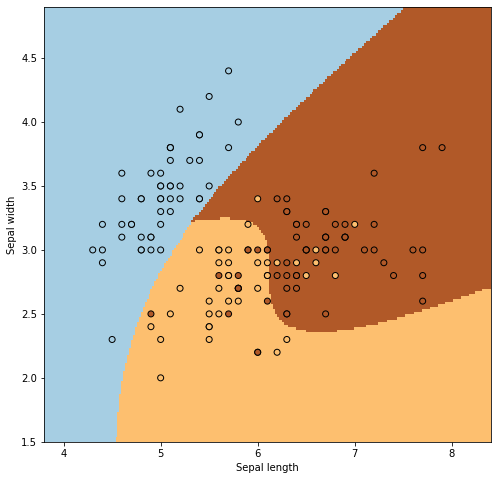

In [ ]:
Z = model2.predict(np.c_[xx.ravel(),yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8,8))
plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired)

plt.scatter(X[:,0], X[:,1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks()
plt.show()


<p><h2>Summary</h2>
<font size="3"><p><ul>
    <li>Логистическая регрессия - это модель, используемая для прогнозирования вероятности возникновения некоторого события путём его сравнения с логистической кривой. В данном случае ключевую роль играет сигмоида.</li>
    <ul><li>При работе с логистической регрессией не забываем про редобработку данных: преобразование категориальных переменные в числа, обнуление ячеек датасета, если данные отсутствуют.</li></ul>
    <li>Метод опорных векторов - поиск тем или иным способом разделяющей гиперплоскости между классами.</li>
    <ul><li>При решении данной задачи происходит перевод исходных векторов в пространство более высокой размерности и поиск гиперплоскости с максимальным зазором в этом пространстве. </li>
        <li>Если линейная разделимость невозможна, то подбираем различные ядра для перехода в пр-во большей размерности, где разделение будет уже линейным.</li>
    </ul>


</ul>

</font>
</p>

<h3>Вопросы для самопроверки</h3>
<p><ol><li>С какими переменными (типом признаков) можно работать в рамках логистической регрессии?</li><li>Как решается проблема линейной неразделимости данных в методе SVM. Какие ядра вы знаете?</li></ol></p>

<h1>Спасибо за внимание!</h1>